In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [140]:
# global vaiables definition
path = "data/urine_test_data.csv"

In [141]:
# load a csv file
def load_data(path):
    try:
      df = pd.read_csv(path)
    except:
      print("An exception occurred!Please check the input path and the file")
    return df

In [142]:
urine_df = load_data(path)

`show_datatypes` returns the count of data types that existed in dataset <p>
<ol>
<li>"int64" : numerical data type.</li>
<li>"object" : string data type</li>
</ol>

In [161]:
def show_datatypes(df):
    return urine_df.dtypes.value_counts()

In [162]:
show_datatypes(urine_df)

object    18
int64     15
dtype: int64

`null_na_check` returns False if the corresponding column contains valid values (no NA, null or other datattypes)

In [164]:
def null_na_check(df):
    return urine_df.isnull().any()

In [165]:
null_na_check(urine_df)

Sample_ID        False
Organism_1       False
Organism_2       False
Organism_3       False
Organism_4       False
Organism_5       False
Organism_6       False
Organism_7       False
Organism_8       False
Organism_9       False
Organism_10      False
Antibiotic_1     False
Antibiotic_2     False
Antibiotic_3     False
Antibiotic_4     False
Antibiotic_5     False
Antibiotic_6     False
Antibiotic_7     False
Antibiotic_8     False
Antibiotic_9     False
Antibiotic_10    False
Antibiotic_11    False
Antibiotic_12    False
Antibiotic_13    False
Antibiotic_14    False
Antibiotic_15    False
Antibiotic_16    False
Antibiotic_17    False
Gene_1           False
Gene_2           False
Gene_3           False
Gene_4           False
Gene_5           False
dtype: bool

<font color='red' size=5>The percentage of samples resistant (R) and sensitive (S) to each antibiotic.</font>

In [119]:
def resistant_percent_plot(df):
    sns.set(rc={'figure.figsize':(6,6)})
    
    cols = ['Antibiotic_1', 'Antibiotic_2', 'Antibiotic_3', 'Antibiotic_4', 'Antibiotic_5', 
            'Antibiotic_6', 'Antibiotic_7', 'Antibiotic_8', 'Antibiotic_9', 'Antibiotic_10',
            'Antibiotic_11', 'Antibiotic_12', 'Antibiotic_13', 'Antibiotic_14', 'Antibiotic_15',
            'Antibiotic_16', 'Antibiotic_17']

    for col in cols:
        sns.displot(data=df, x=col, stat='percent', hue=col).set(title='The percentage of samples resistant (R) and sensitive (S) to ' + col + '.')

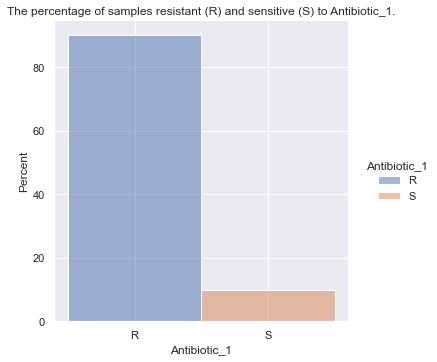

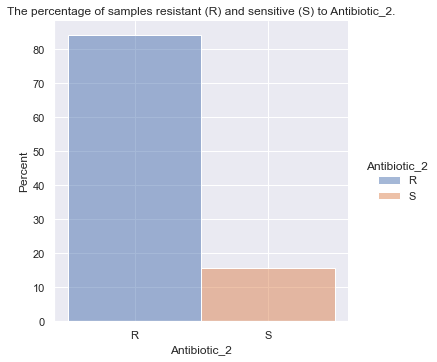

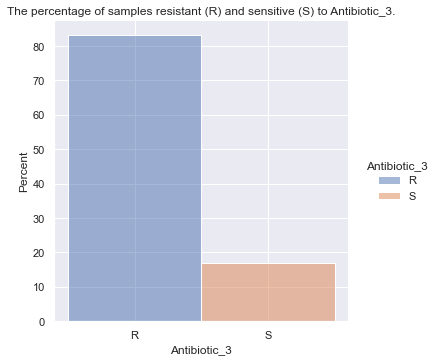

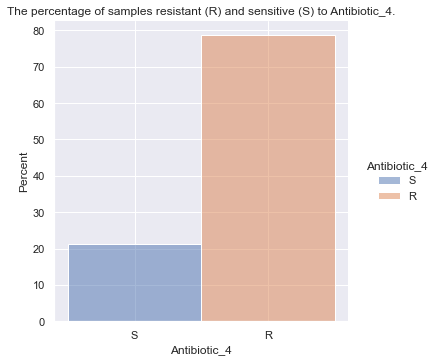

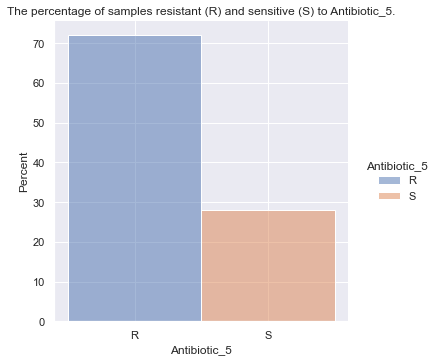

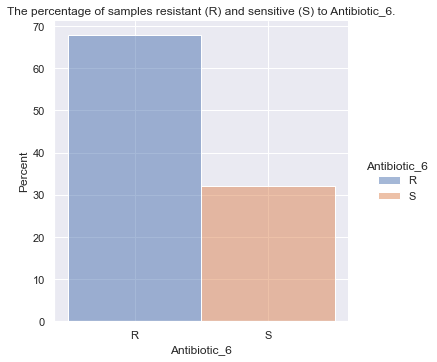

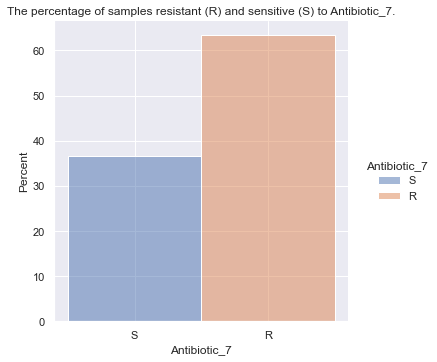

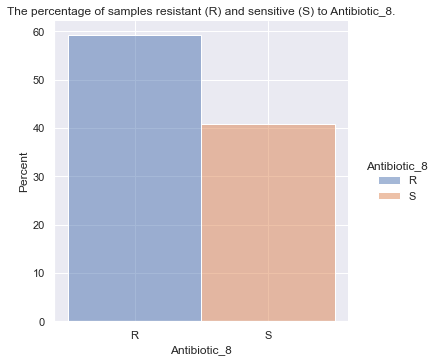

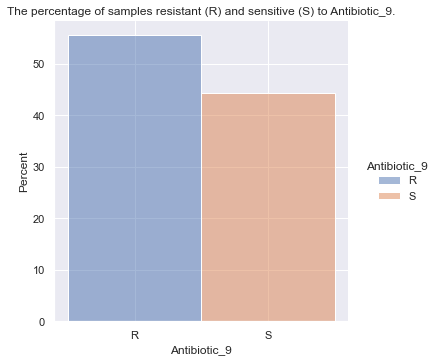

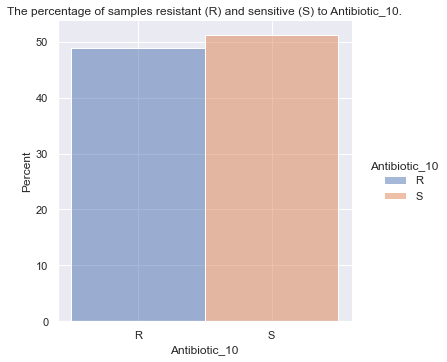

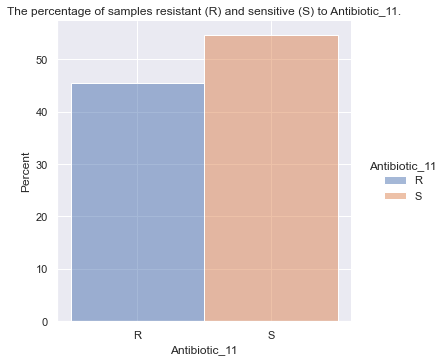

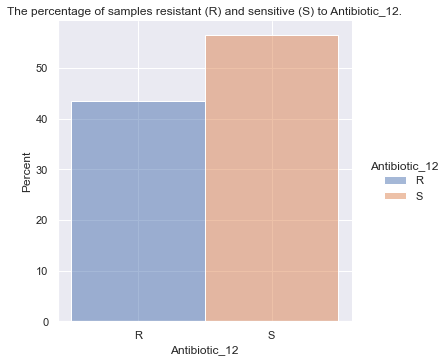

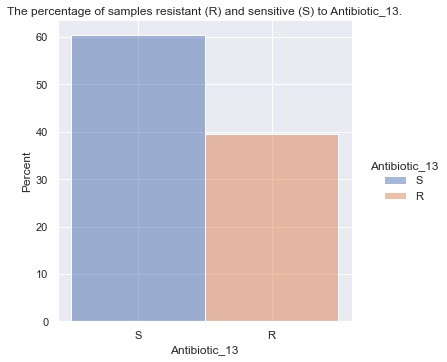

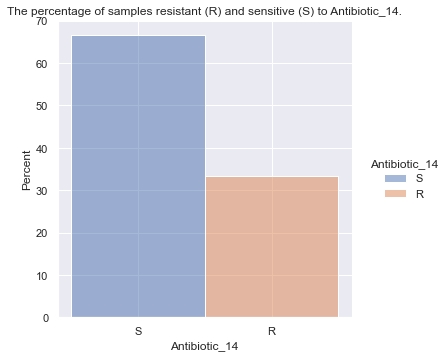

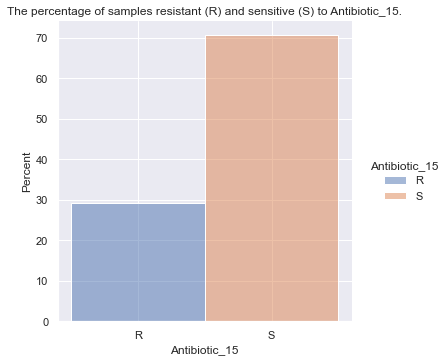

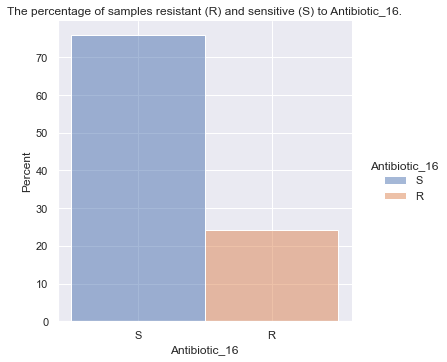

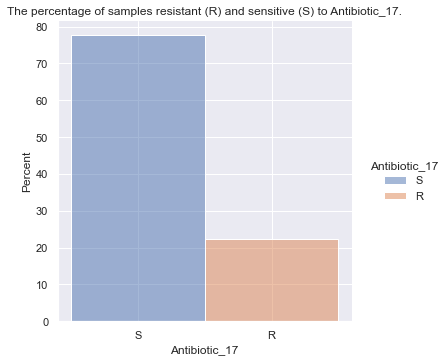

In [120]:
resistant_percent_plot(urine_df)

<font color='red' size=5>The presence of each resistance gene across the samples.</font>

In [103]:
def resistence_gene_presence(df):
    sns.set(rc={'figure.figsize':(8,6)})
    resistence_gene_count = []
    genes_columns = ['Gene_1','Gene_2', 'Gene_3','Gene_4','Gene_5']
    genes_df = pd.DataFrame(data=df , columns = genes_columns)
    
    for col in genes_columns:
        resistence_gene_count.append(genes_df[(genes_df[col] == 1)].count()[col])
    
    sns.barplot(x=genes_columns, y=resistence_gene_count).set(title='The presence of each resistance gene across the samples')

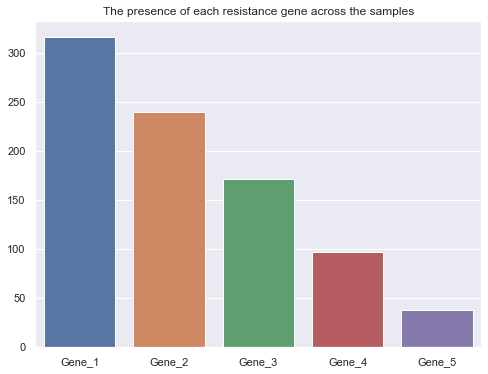

In [104]:
 resistence_gene_presence(urine_df)

<font color='red' size=5>The distribution of cell counts for each organism.</font>

In [83]:
organisms_columns = ['Organism_1','Organism_2', 'Organism_3','Organism_4','Organism_5',
                         'Organism_6', 'Organism_7', 'Organism_8', 'Organism_9', 'Organism_10']

def cell_count_dist_boxplot(df, cols):
    sns.set(rc={'figure.figsize':(12,8)})
    organisms_df = pd.DataFrame(data=df , columns = cols)

    sns.boxplot(data=organisms_df)


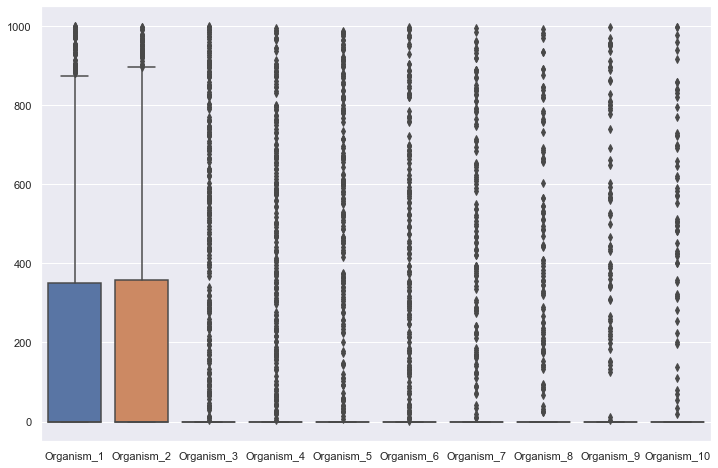

In [84]:
cell_count_dist_boxplot(urine_df, organisms_columns)

In [123]:
def cell_count_dist_plot_bias(df, cols):
    sns.set(rc={'figure.figsize':(8,8)})
    for i, col in enumerate(cols):
        plt.figure(i)
        sns.distplot(df[col], kde=True, color='red')

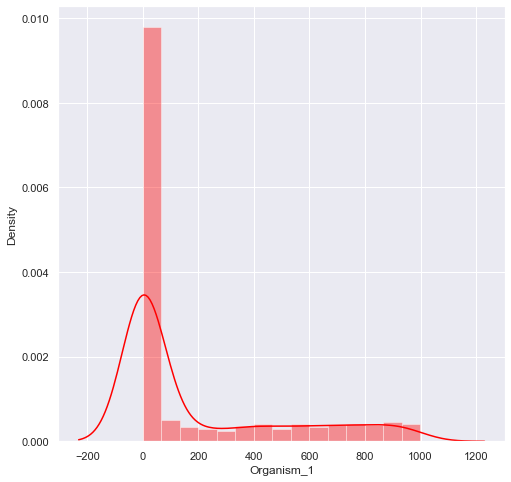

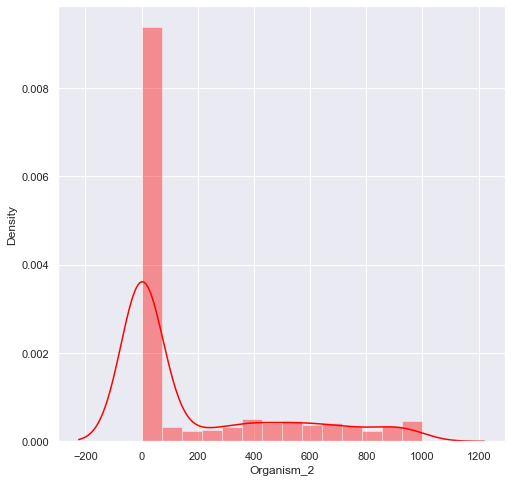

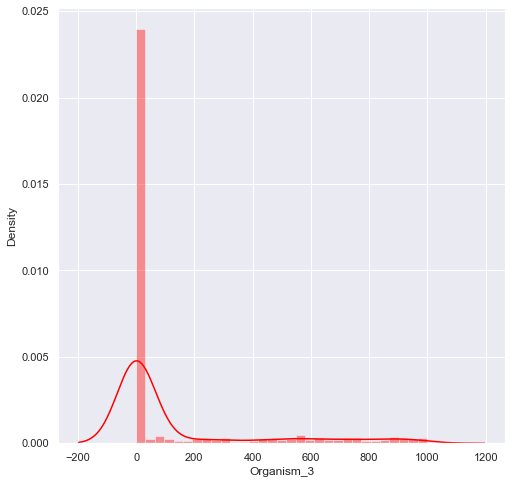

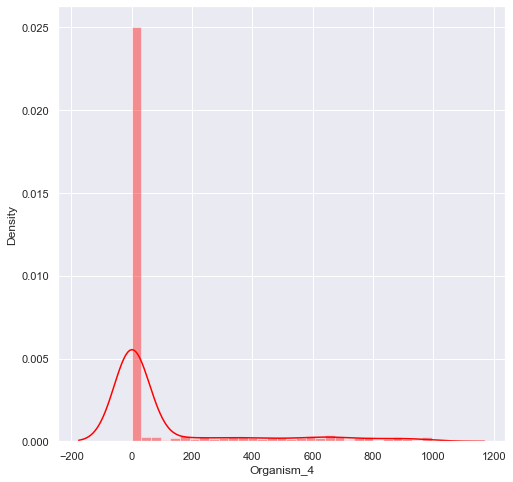

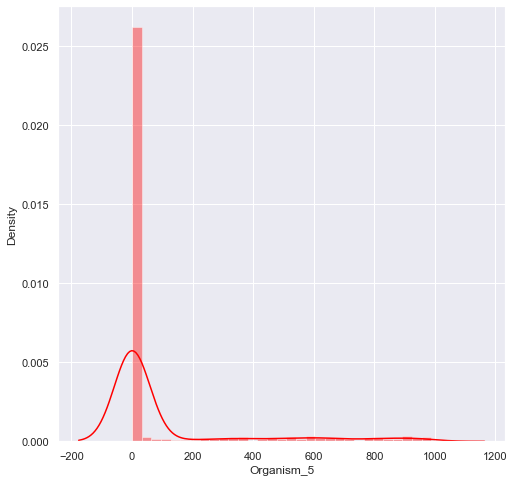

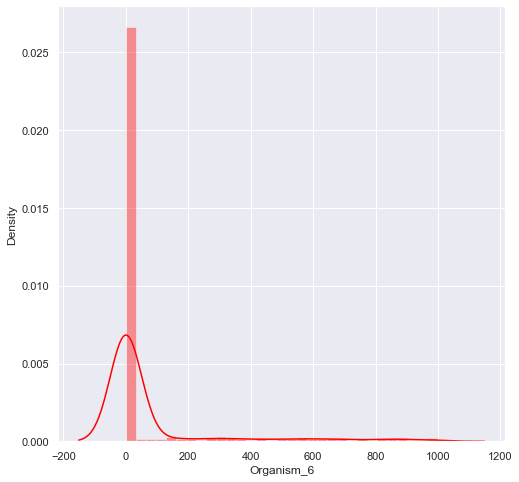

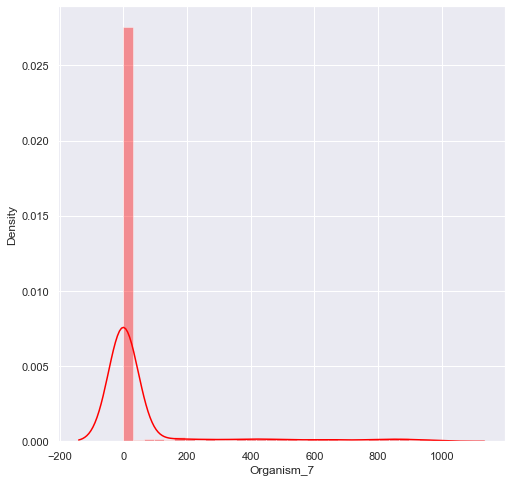

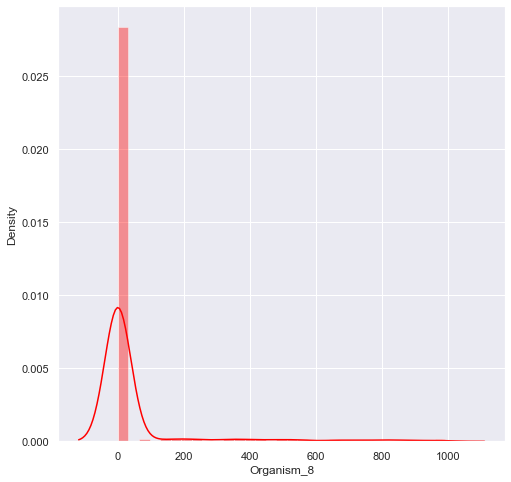

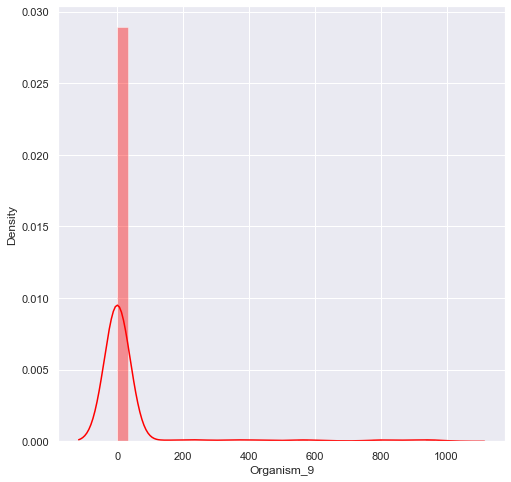

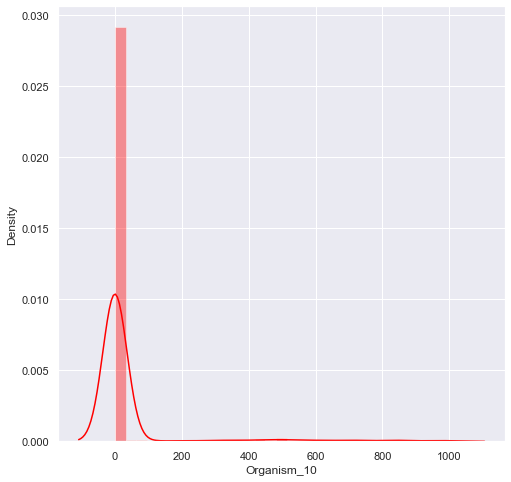

In [124]:
cell_count_dist_plot_bias(urine_df, organisms_columns)

In [125]:
def cell_count_dist_plot(df, cols):
    sns.set(rc={'figure.figsize':(8,8)})
    for i, col in enumerate(cols):
        plt.figure(i)
        df_temp = df[df[col] != 0]
        sns.distplot(df_temp[col], kde=True, color='red')

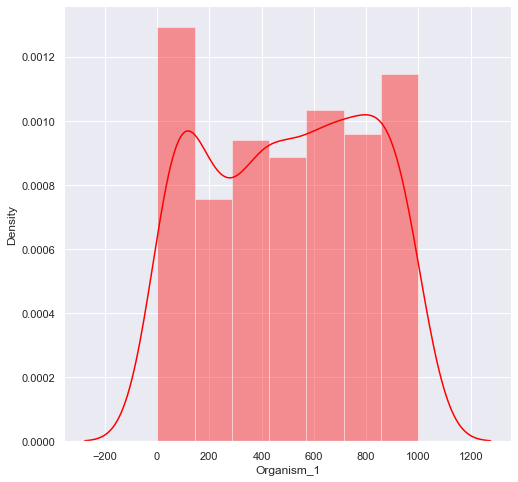

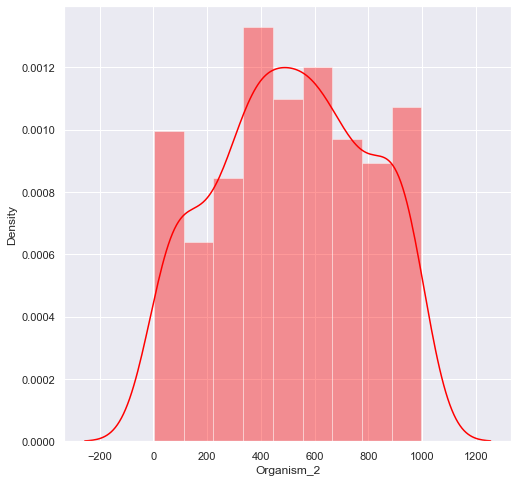

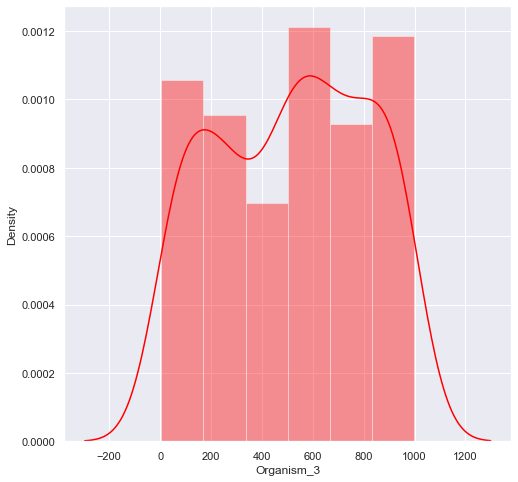

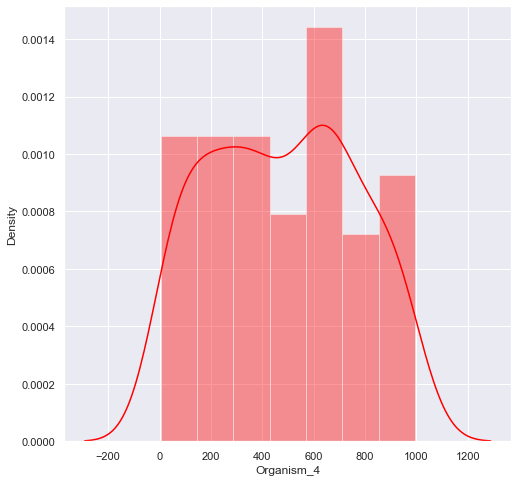

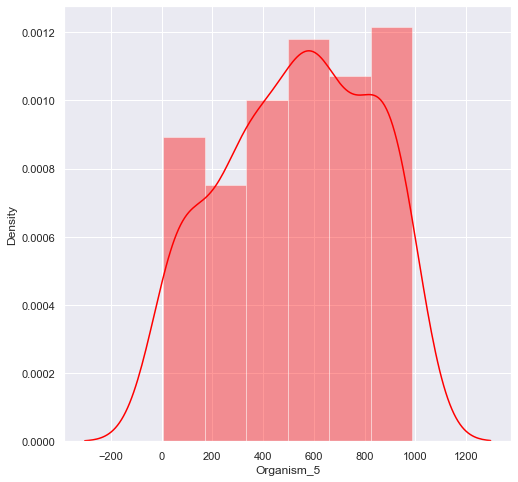

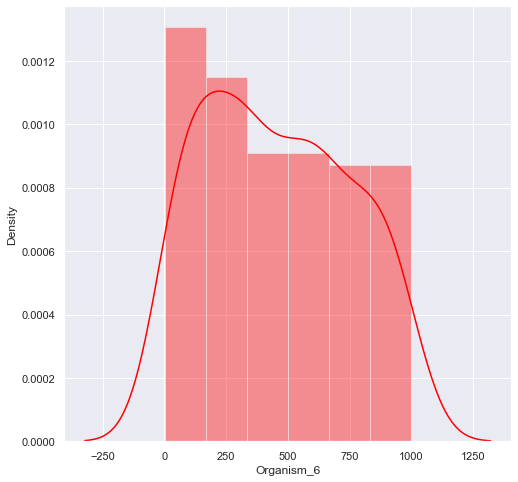

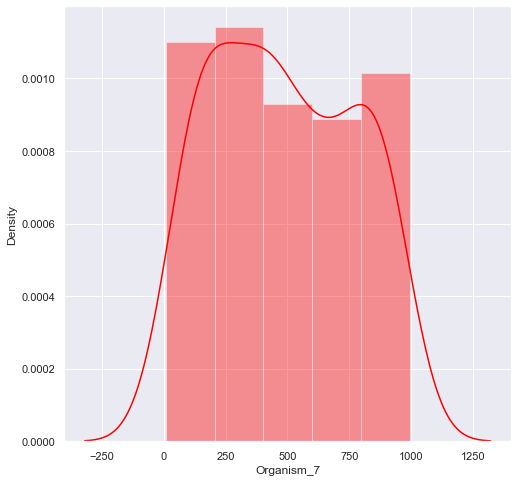

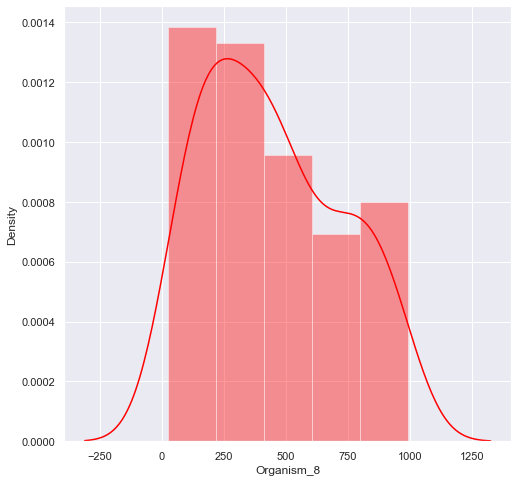

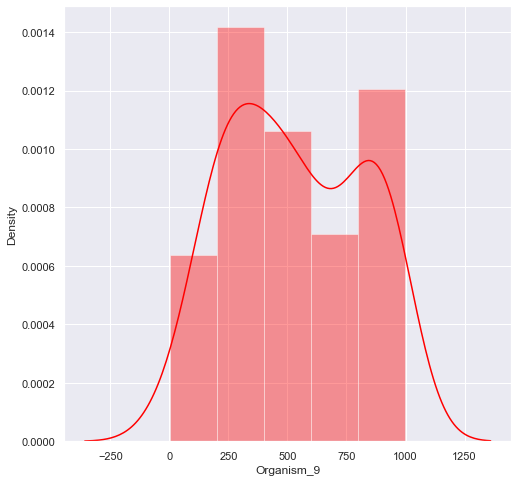

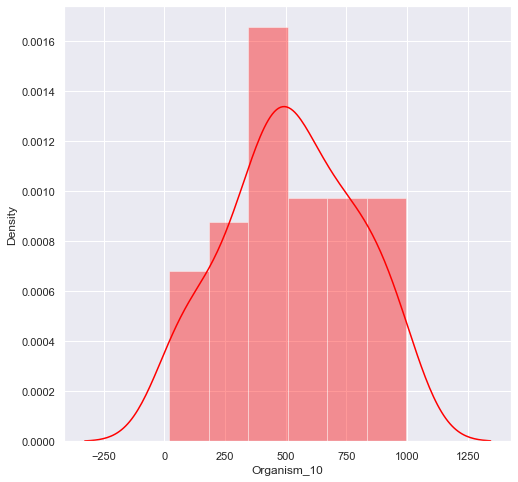

In [126]:
cell_count_dist_plot(urine_df, organisms_columns)